(content:code-outputs)=

# Formatting code outputs

The formatting of code outputs is highly configurable.
Below we give examples of how to format particular outputs and even insert outputs into other locations of the document.

The [MyST cheat sheet](myst_cheatsheet) provides a [list of `code-cell` tags available](myst_cheatsheet:code-cell:tags)

:::{seealso}
The [MyST-NB documentation](myst-nb:use/format/cutomise), for how to fully customize the output renderer.
:::

(content:code-outputs:library-outputs)=
## Library output formatting

Many libraries support their own HTML output formatting, and this generally carries over to Jupyter Book outputs as well.

For example, the following cell uses Pandas to format cells based on their values:

In [1]:
import numpy as np
import pandas as pd

np.random.seed(24)
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
df.iloc[3, 3] = np.nan
df.iloc[0, 2] = np.nan

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df.style.\
    applymap(color_negative_red).\
    apply(highlight_max).\
    set_table_attributes('style="font-size: 10px"')

See the [Pandas Styling docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html) for more information about styling DataFrames, and check out the documentation of your library of choice to see if they support similar features.

(content:code-outputs:scrolling)=
## Scrolling cell outputs

The traditional Jupyter Notebook interface allows you to toggle **output scrolling**
for your cells. This allows you to visualize part of a long output without it taking up
the entire page.

You can trigger this behavior in Jupyter Book by adding the following
tag to a cell's metadata:

```json
{
    "tags": [
        "output_scroll",
    ]
}
```

For example, the following cell has a long output, but will be scrollable in the book:

In [2]:
for ii in range(40):
    print(f"this is output line {ii}")

this is output line 0
this is output line 1
this is output line 2
this is output line 3
this is output line 4
this is output line 5
this is output line 6
this is output line 7
this is output line 8
this is output line 9
this is output line 10
this is output line 11
this is output line 12
this is output line 13
this is output line 14
this is output line 15
this is output line 16
this is output line 17
this is output line 18
this is output line 19
this is output line 20
this is output line 21
this is output line 22
this is output line 23
this is output line 24
this is output line 25
this is output line 26
this is output line 27
this is output line 28
this is output line 29
this is output line 30
this is output line 31
this is output line 32
this is output line 33
this is output line 34
this is output line 35
this is output line 36
this is output line 37
this is output line 38
this is output line 39


(content:code-outputs:images)=
## Images

For any image types output by the code, we can apply formatting *via* cell metadata.
Then for the image we can apply all the variables of the standard [image directive](https://docutils.sourceforge.io/docs/ref/rst/directives.html#image):

```{margin}
Units of length are: 'em', 'ex', 'px', 'in', 'cm', 'mm', 'pt', 'pc'
```

- **width**: length or percentage (%) of the current line width
- **height**: length
- **scale**: integer percentage (the "%" symbol is optional)
- **align**: "top", "middle", "bottom", "left", "center", or "right"
- **classes**: space separated strings
- **alt**: string

We can also set a caption (which is rendered as [CommonMark](https://commonmark.org/)) and name by which to reference the figure. The code

````md
```{code-cell} ipython3
---
render:
  image:
    width: 200px
    alt: fun-fish
    classes: shadow bg-primary
  figure:
    caption: |
      Hey everyone its **party** time!
    name: fun-fish
---
from IPython.display import Image
Image("../images/fun-fish.png")
```
````

produces the following code cell and figure:

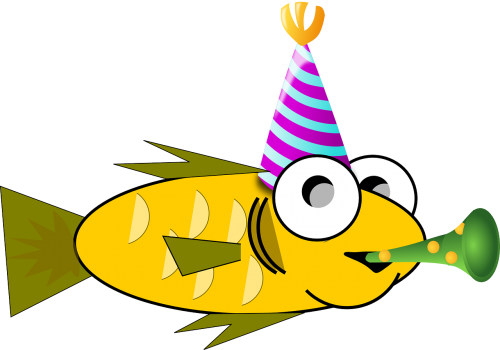

In [3]:
from IPython.display import Image
Image("../images/fun-fish.png")

Now we can link to the image from anywhere in our documentation: [swim to the fish](fun-fish)

:::{seealso}
[](jupyter-cell-tags)
:::

(content:code-outputs:markdown)=
## Markdown

Markdown output is parsed by MyST-Parser, currently with the parsing set to strictly [CommonMark](https://commonmark.org/).

The parsed Markdown is then integrated into the wider context of the document. This means it is possible, for example, to include internal references:

In [4]:
from IPython.display import display, Markdown
display(Markdown('**_some_ markdown** and an [internal reference](use/format/markdown)!'))

**_some_ markdown** and an [internal reference](use/format/markdown)!

and even internal images can be rendered, as the code below exemplifies:

In [5]:
display(Markdown('![figure](../images/logo-wide.svg)'))

![figure](../images/logo-wide.svg)

(content:code-outputs:ansi)=
## ANSI outputs

By default, the standard output/error streams and text/plain MIME outputs may contain ANSI escape sequences to change the text and background colors.

In [6]:
import sys
print("BEWARE: \x1b[1;33;41mugly colors\x1b[m!", file=sys.stderr)
print("AB\x1b[43mCD\x1b[35mEF\x1b[1mGH\x1b[4mIJ\x1b[7m"
      "KL\x1b[49mMN\x1b[39mOP\x1b[22mQR\x1b[24mST\x1b[27mUV")

ABCDEFGHIJKLMNOPQRSTUV


BEWARE: ugly colors!


This uses the built-in {py:class}`~myst-nb:myst_nb.ansi_lexer.AnsiColorLexer` [pygments lexer](https://pygments.org/).
You can change the lexer used in the `_config.yml`, for example to turn off lexing:

```yaml
sphinx:
  config:
    nb_render_text_lexer: "none"
```

The following code shows the 8 basic ANSI colors it is based on.
Each of the 8 colors has an “intense” variation, which is used for bold text.

In [7]:
text = " XYZ "
formatstring = "\x1b[{}m" + text + "\x1b[m"

print(
    " " * 6
    + " " * len(text)
    + "".join("{:^{}}".format(bg, len(text)) for bg in range(40, 48))
)
for fg in range(30, 38):
    for bold in False, True:
        fg_code = ("1;" if bold else "") + str(fg)
        print(
            " {:>4} ".format(fg_code)
            + formatstring.format(fg_code)
            + "".join(
                formatstring.format(fg_code + ";" + str(bg)) for bg in range(40, 48)
            )
        )

            40   41   42   43   44   45   46   47  
   30  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;30  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   31  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;31  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   32  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;32  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   33  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;33  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   34  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;34  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   35  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;35  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   36  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;36  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   37  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;37  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 


:::{note}
ANSI also supports a set of 256 indexed colors.
This is currently not supported, but we hope to introduce it at a later date
(raise an issue on the repository if you require it!).
:::

(content:code-outputs:priority)=
## Render priority

When Jupyter executes a code cell it can produce multiple outputs, and each of these outputs can contain multiple [MIME media types](https://developer.mozilla.org/en-US/docs/Web/HTTP/Basics_of_HTTP/MIME_types) to use with different output formats (like HTML or LaTeX).

MyST-NB stores a default priority dictionary for most of the common [output builders](https://www.sphinx-doc.org/en/master/usage/builders/index.html), which you can also update in your `_config.yml`.
For example, this is the default priority list for HTML:

```yaml
sphinx:
  config:
    nb_render_priority:
      html:
      - "application/vnd.jupyter.widget-view+json"
      - "application/javascript"
      - "text/html"
      - "image/svg+xml"
      - "image/png"
      - "image/jpeg"
      - "text/markdown"
      - "text/latex"
      - "text/plain"
```